In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

## Missing value
Info method gives all the details about columns, therefore we can identify how many missing value persent in the intire entries. 


In [8]:
train.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# Here we see in the train dataset in Cabine column there is only 204 non-null value persent in the 891 total entries. 

In [11]:
#Therefore we can drop these column

In [12]:
#train.drop([columns='Cabine']) #Since it not permanant operation therefore we use inplace==true

In [13]:
train.drop(columns=['Cabin'], inplace=True)

In [14]:
test.drop(columns=['Cabin'], inplace=True)

In [15]:
train.isnull() # Gives boolian value True or false, If there is null value than gives Ture otherwise gives false

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# To see how many null value persent in the intire column we can write

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

# Identify which city passanger is traveling more

In [19]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# Here we see more people are going to S ie 644 (Therefore We can fill the na or Misssing values with the S)

In [21]:
# We know there are 2 missing value in the Embarked Column. Replace the missing value with S

In [22]:
train['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [23]:
#Since this is not permanant. For the permanant we can write inplace = True

In [24]:
train['Embarked'].fillna('S',inplace = True)

In [25]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [26]:
train.isnull().sum()   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [27]:
 # Here we see there is no missing value in the Embarked column
# But in the Age column 177 missing value persent

In [28]:
#On the above test set we saw that 1 missing value was present in the Fare column.
# Now handle this missing value by replacing mean value

In [29]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [31]:
#Since 177 value misiing in age column in train dataset.
# if we see the percentage 

In [32]:
(177/891)*100

19.865319865319865

In [33]:
# Here we see 19% values are missing. If we delete the Age column in train dataset then we have to delete 19% rows. 
#If there are 1cr data find dely and remove  19% of data that is too much, Therefore we shouldn't remove it.
# Then what we have to do
#        Now generate 177 random value

In [34]:
np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

array([21, 40, 29, 24, 30, 16, 32, 30, 40, 20, 39, 19, 19, 21, 37, 29, 18,
       28, 36, 35, 15, 20, 29, 32, 27, 32, 35, 20, 38, 27, 17, 15, 24, 42,
       19, 23, 31, 41, 39, 15, 22, 20, 22, 22, 36, 19, 21, 27, 21, 15, 15,
       32, 28, 30, 29, 26, 28, 31, 35, 15, 18, 15, 21, 22, 36, 40, 15, 26,
       21, 15, 16, 32, 43, 16, 29, 38, 20, 17, 23, 30, 36, 34, 29, 29, 36,
       29, 27, 28, 22, 23, 41, 30, 23, 37, 27, 22, 16, 39, 35, 29, 42, 23,
       33, 29, 41, 22, 25, 41, 43, 18, 20, 15, 28, 39, 22, 28, 39, 25, 30,
       32, 33, 39, 28, 17, 24, 31, 41, 15, 17, 23, 36, 26, 15, 24, 36, 24,
       24, 36, 42, 23, 35, 30, 23, 36, 16, 15, 15, 22, 22, 33, 25, 36, 18,
       25, 42, 41, 42, 37, 16, 36, 37, 37, 30, 23, 35, 18, 20, 38, 42, 33,
       28, 34, 39, 23, 20, 30, 35])

In [35]:
#Now store this value in train_age variable

In [36]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [37]:
#train_age
train_age

array([19, 34, 20, 24, 43, 20, 27, 16, 35, 40, 43, 20, 28, 31, 29, 39, 42,
       26, 22, 21, 33, 37, 24, 21, 35, 23, 25, 37, 35, 40, 33, 27, 25, 33,
       16, 15, 35, 38, 42, 22, 26, 32, 23, 28, 37, 23, 28, 22, 42, 33, 29,
       41, 26, 35, 32, 27, 31, 27, 20, 17, 28, 15, 20, 30, 38, 29, 37, 17,
       27, 35, 21, 29, 22, 19, 25, 29, 22, 31, 27, 32, 35, 24, 43, 43, 21,
       23, 26, 19, 28, 39, 25, 17, 17, 38, 16, 28, 37, 37, 25, 39, 17, 19,
       21, 36, 20, 36, 25, 20, 43, 19, 30, 41, 33, 42, 25, 34, 43, 29, 22,
       43, 18, 15, 26, 24, 25, 38, 29, 37, 37, 25, 42, 41, 33, 26, 30, 25,
       30, 18, 15, 39, 29, 25, 22, 36, 33, 20, 38, 31, 25, 24, 41, 37, 41,
       25, 19, 22, 30, 29, 26, 24, 37, 20, 23, 29, 29, 30, 29, 26, 21, 16,
       39, 29, 42, 37, 41, 42, 43])

In [38]:
# Similarlly do the same with the test dataset

In [39]:
test_age=np.random.randint(test['Age'].mean()-train['Age'].std(),test['Age'].mean()+train['Age'].std(),86)

In [40]:
test_age

array([35, 34, 17, 32, 20, 39, 34, 26, 39, 41, 34, 33, 37, 26, 35, 35, 28,
       29, 40, 27, 20, 23, 21, 35, 40, 34, 28, 25, 36, 19, 16, 19, 37, 21,
       20, 27, 36, 16, 34, 33, 30, 38, 38, 29, 34, 36, 16, 19, 29, 26, 26,
       19, 19, 42, 34, 15, 25, 25, 23, 20, 42, 41, 35, 17, 24, 34, 28, 41,
       31, 30, 42, 29, 41, 18, 17, 26, 22, 33, 24, 33, 20, 42, 17, 22, 32,
       35])

In [41]:
# Now see the null value in Age column in train data set

In [42]:
train['Age'].isnull() 

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [43]:
train['Age'].shape

(891,)

In [44]:
#Here we see 891 rows but we need 177 rows
# We can do this by mapping

In [45]:
train['Age'][train['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [46]:
train['Age'][train['Age'].isnull()].shape

(177,)

In [47]:
# All 177 values are Nan
# Now replace this nan value train_age

In [48]:
train['Age'][train['Age'].isnull()]=train_age

/tmp/ipykernel_514/4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [49]:
# This is not an error, It is showing a warning, bacically saying its seting a copy which   
# which is not all dataframe 
# but its some part of the dataframe

In [50]:
train.isnull().sum() #To see oll the null value 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
test['Age'][test['Age'].isnull()]=test_age

/tmp/ipykernel_514/3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [52]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
# Above we see there is no missing value in any column in test or train dataset

# Data analysis process:

1 - Asking the right question

2 - Data preprocessing

3 - Exploratory Data Analysis(EDA)

4 - Confine Conclusion

5 - Convey Result

## 1 & 2 stepe we have done

## EDA

In [54]:
# See all the columns one by one depndency on the Servival column
# And decide which column we have to remove such that there will be no effect on result and its accuracy


In [55]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,43.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [56]:
# 1: PassengerId - It will be needed at the end
# 2: Survived - It is our final column


In [57]:
# 3: Pclass - Let see 
      #Apply the filter
      #Fatch that rows in which Pclass ==1 than count that how many people dead and how many people saved

In [58]:
train[train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [59]:
# Here we see 136 people saved while 80 people dead in Pclass1
# Simillarly we can see Pclass 2 and Pclass 3 

In [60]:
train[train['Pclass']==2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [61]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [62]:
# We noticed that less people dead and more people saved in  Pclass 1 
#                 If we see Pclass 2 more people are dead and less people are saved
#                 But if we talk about Pclass 3 more people are dead then 2

In [63]:
# Now see how many % of people were survived in Pclass 1, 2 and 3

In [64]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [65]:
# Clearly we see here the people who were traveling in Pclass 1 they have maximum chances to survived
# then other 2 and 3 Pclass.
# Therfore it is clear that there is a mathmatical correlation between Pclass and Survival column

In [66]:
# Now see the sex column

In [67]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [68]:
# Here we see 74% chances to save for female incamparision to 18% of male.
# Here we see the mathematical dependency sex and survival or mathmatical correlation betweeen Sex and Survival.
# Therefore we cann't remove the Sex column

In [69]:
# Now see the Embarked column

In [70]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [71]:
# Here we see in C have more chances 55% to save other than Q(38%) & S(33%)
# So we can't delete this column due to the correlation between Embarked and Survival column

In [72]:
# Now see the next column ie age

In [73]:
train.groupby(['Age'])['Survived'].mean() 

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

In [74]:
# Since Age is numerical column therefore we perform below operation

/tmp/ipykernel_514/3078857304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])


<AxesSubplot: xlabel='Age', ylabel='Density'>

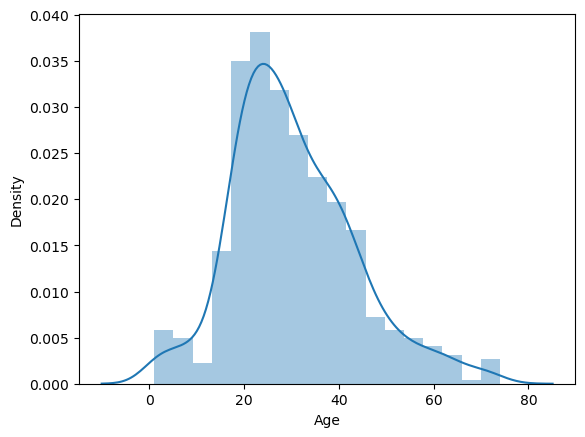

In [75]:
sns.distplot(train['Age'][train['Survived']==0])

/tmp/ipykernel_514/1923649497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<AxesSubplot: xlabel='Age', ylabel='Density'>

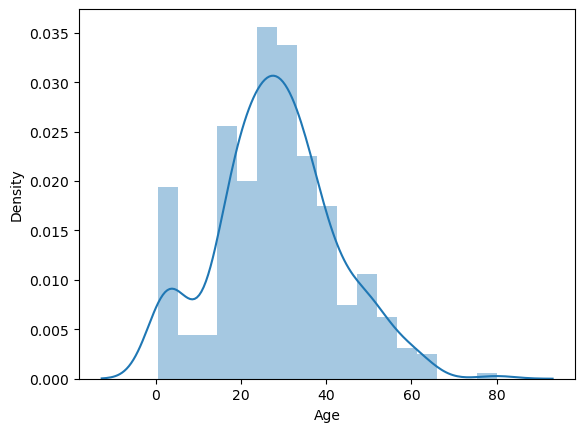

In [76]:
sns.distplot(train['Age'][train['Survived']==1])

/tmp/ipykernel_514/3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
/tmp/ipykernel_514/3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<AxesSubplot: xlabel='Age', ylabel='Density'>

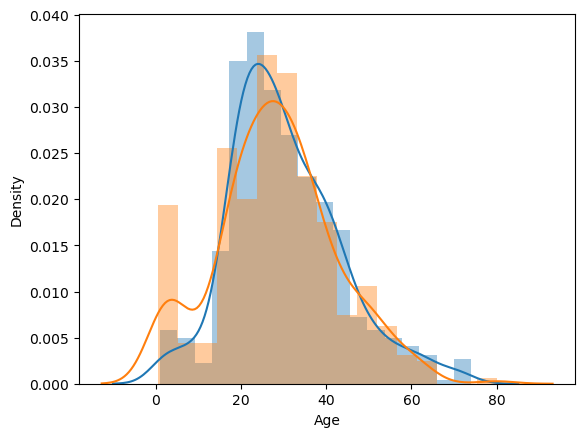

In [77]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

In [78]:
# Here orange color showing the saved people
# In the range of children orange color is over than the blue color which shows in the age of children saved more
# According to the pattern, If age is less then less dead  when age is going to medium then more people are dead and after that when age is increasing than more people saved
# Therefor Age is also correlated with the Survical 
# So we can't remove this(Age) column

In [79]:
#Now see the Fare column

/tmp/ipykernel_514/2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
/tmp/ipykernel_514/2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

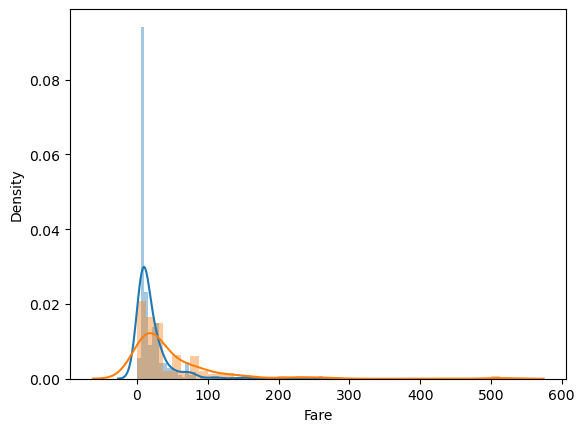

In [80]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [81]:
# Here we see in the orange graph as for as fare is increrasing, dominating the blue curve it means more fare more chances of Survival.
# Therefore fare also showing the correlation between Fare and Survival
# So we can't remove Fare column

In [82]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [83]:
# Now see the Ticket column
# We can remove this column because there will be no effect on Survival
# There is not happen that particular people who have ticket no is this will die
# So there there is no correlation between Ticket and Survival


In [84]:
# Drop the Ticket Column from train and test dataset.
# Since this is not permanant so we write inplace = True for permanant operation

In [85]:
train.drop(columns=['Ticket'], inplace=True)

In [86]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [87]:
# Here we see Ticket column has been removed

In [88]:
# Now do the same with the test dataset

In [89]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [90]:
test.drop(columns=['Ticket'], inplace=True)

In [91]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [92]:
# Here we see Tickt column has been removed from the test dataset

In [93]:
# Now we have to work on rest of two columns Parch and Sibsp
# Both of these columns are family ie Parent Child and Sibling Spouse

In [94]:
# Since both of these columns related to the family therefore combine these two columns and make a new column by the name of family.

In [95]:
train['Family'] = train['SibSp'] + train['Parch'] + 1

In [96]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [97]:
# Here we see 537 people are traveling alone
#               7 people are traveling with 11 people of their family and so on
#             No one people are trveling with family member 9 and 10

In [98]:
# Now do the same with test dataset

In [99]:
test['Family'] = test['SibSp'] + train['Parch'] + 1
test['Family'].value_counts()

1.0     213
2.0     127
3.0      52
4.0      13
5.0       6
7.0       3
8.0       1
10.0      1
13.0      1
6.0       1
Name: Family, dtype: int64

In [100]:
# Now we see how many people are dead while traveling how many with their family members.

In [101]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [102]:
# Here we see the people who were traveling with their 11 & 8 family members all of them are dead.
#             30% people were saved who traveling with their 1 family member
#              72% people were saved who traveling with their 4 family members


In [103]:
# We see the pattern the people who are traveling alone they have minmum no of chance to save 
#                    the people who are traveling 2,3 and 4 family members the chances of saving their life is increasing 
#                    and again when family members increasing more than 4 the chances of saving their life is decreasing till 7 family members
#                    and more than 7 family members the chances of saving their life is 0

In [104]:
# Therefor we can devide these 9 categories in to 3 categories
#     1 - Traveling alone
#     2 - Traveling with 2 to 4 family members, let say medium and
#     3 - Traveling with more than 4 family members, let say large  

In [105]:
# Do the seme with test data set

In [106]:
### test.groupby(['Family'])['Survived'].mean() ----- showing Survived column does not exists.

In [107]:
# Now make a function for these 3 categories 
# Let's say cal function

In [108]:
def cal(number):
    if number == 1:
        return 'alone'
    elif number >1 and number < 5:
        return 'medium'
    else:
        return 'large'

In [109]:
# Now make a new column by the name of Family_Size which will be equal to Family column of train
# and pass the cal function inside apply

In [110]:
train['Family_Size'] = train['Family'].apply(cal)

In [111]:
train['Family_Size']

0      medium
1      medium
2       alone
3      medium
4       alone
        ...  
886     alone
887     alone
888    medium
889     alone
890     alone
Name: Family_Size, Length: 891, dtype: object

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,alone


In [113]:
# Do the same with the test dataset

In [114]:
test['Family_Size'] = test['Family'].apply(cal)

In [115]:
test['Family_Size']

0       alone
1      medium
2       alone
3       alone
4      medium
        ...  
413     alone
414     alone
415     alone
416    medium
417    medium
Name: Family_Size, Length: 418, dtype: object

In [116]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1.0,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2.0,medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1.0,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1.0,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2.0,medium


In [117]:
# If we think logically, Is there any need to remain the column Parch, SibSp and Family?
# These 3 columns Parch, SibSp and Family are extra columns.
# Therfor we need to remove(drop) these columns so that our model become complex to simple,
#                                        when we give as much as minimum input than algorithm will understand easily.

In [118]:
# Now drop the columns Parch, SibSp and family. 

In [119]:
train.drop(columns=['Parch', 'SibSp', 'Family'], inplace=True)

In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,alone


In [121]:
# Now do the same with test dataset

In [122]:
test.drop(columns=['Parch', 'SibSp', 'Family'], inplace=True)

In [123]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,medium


In [124]:
# Now print the shape

In [125]:
print(train.shape)

(891, 9)


In [126]:
print(test.shape)

(418, 8)


In [127]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

In [128]:
# Here we see PassengerId and Name are remain
# Name can be removed because there is no effect on Survivl Column but PassengerId may effect.
# Therefore save the PassengerId column by creating a new variable of test dataset as the name of passengerId so that we can use in future.


In [129]:
passengerId=test['PassengerId'].values

In [130]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [131]:
 passengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [132]:
# Now drop the Name and PassengerId column from train and test dataset

In [133]:
train.drop(columns=['Name', 'PassengerId'], inplace=True)

In [134]:
test.drop(columns=['Name', 'PassengerId'], inplace=True)

In [135]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

In [136]:
# Now there is only columns remain for anlysis which we have to give the algorithm finaly. 

In [137]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
0,0,3,male,22.0,7.2500,S,medium
1,1,1,female,38.0,71.2833,C,medium
2,1,3,female,26.0,7.9250,S,alone
3,1,1,female,35.0,53.1000,S,medium
4,0,3,male,35.0,8.0500,S,alone


In [138]:
# Here we see Pclass, Sex, Embarked and Family_Size these four columns are categorical but we know algorithm accept only numerical value.
# Therfor we have to convert these categorical value to numerical value
# For converting this we have to use a pandas function known as getdummies variable

In [139]:
# Now see the shape of train

In [140]:
train.shape

(891, 7)

In [141]:
# Now convert above categorical to numerical value


In [142]:
#pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked', 'Family_Size'], drop_first=True)

In [143]:
# Here we see all the columns are hold numerical value
# Since this is not permanent operation therefor we need to store back in  train variable 

In [144]:
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked', 'Family_Size'], drop_first=True)

In [145]:
train.shape 

(891, 10)

In [146]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_large,Family_Size_medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0


In [147]:
# Now do the same with test data set

In [148]:
test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked', 'Family_Size'], drop_first=True)

In [149]:
test.shape

(418, 9)

In [150]:
test.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_large,Family_Size_medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1


In [155]:
# Now spliting X and Y in train and test dataset

In [153]:
train 

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_large,Family_Size_medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,43.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [156]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_large,Family_Size_medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,22.0,8.0500,0,1,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0
415,38.5,7.2500,0,1,1,0,1,0,0
416,32.0,8.0500,0,1,1,0,1,0,1


In [157]:
# Since there is no Survival column in test dataset.
# But in train Survival column is exists therefor split this in X and Y



In [158]:
# Since Survival is firt column

In [165]:
X = train.iloc[:, 1:].values # All rows and except Survival from first to all the columns

In [166]:
X

array([[22.    ,  7.25  ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [38.    , 71.2833,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [26.    ,  7.925 ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       ...,
       [43.    , 23.45  ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [26.    , 30.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [32.    ,  7.75  ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [167]:
Y = train.iloc[:, 0].values

In [169]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [170]:
# Now Split in to train and test by using train_test_split() from sklearn

In [177]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [180]:
# Now train the model

In [202]:
from sklearn.tree import DecisionTreeClassifier 

In [203]:
calssifier = DecisionTreeClassifier()

In [205]:
calssifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [206]:
y_perd = calssifier.predict(X_test)

In [207]:
# Find the accuray

In [209]:
from sklearn.metrics import accuracy_score

In [211]:
accuracy_score(y_perd, Y_test)

0.7653631284916201